## Carga y prueba inicial


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import pandas as pd

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale = 1./255
)

train_dataset = datagen.flow_from_directory('/content/drive/MyDrive/TFM/dataset/dataset_reducido',
                                            batch_size=100,
                                            target_size=(224,224),
                                            class_mode='categorical')

Found 103 images belonging to 4 classes.


In [ ]:
print(train_dataset)

In [ ]:
train_dataset.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
train_dataset

In [ ]:
label_names = ['Closed look', 'Forward look', 'Left look', 'Right look']

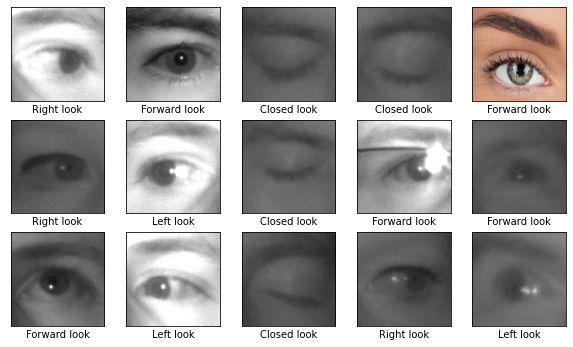

In [ ]:
# Visualización total o parcial de los datos
plt.figure(figsize=(10,10))
for imagen, etiqueta in train_dataset:
  for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(224, 224, 3))
    plt.xlabel(label_names[np.argmax(etiqueta[i])])
  break

## Split the dataset in train and test

In [ ]:
import os
import numpy as np
import shutil
import random
root_dir = "/content/drive/MyDrive/TFM/dataset/dataset_completo/" # for requesting directly pics
classes_dir = os.listdir(root_dir)

train_ratio = 0.8
val_ratio = 0.1

input_destination = "/content/drive/MyDrive/TFM/dataset/"

for cls in classes_dir:
    os.makedirs(input_destination +'train_dataset/' + cls, exist_ok=True)
    os.makedirs(input_destination +'val_dataset/' + cls, exist_ok=True)
    os.makedirs(input_destination +'test_dataset/' + cls, exist_ok=True)

    # for each class, let's counts its elements
    src = root_dir + cls
    allFileNames = os.listdir(src)

    # shuffle it and split into train/test
    np.random.shuffle(allFileNames)
    train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(train_ratio * len(allFileNames)), int((1-val_ratio) * len(allFileNames))])

    # save their initial path
    train_FileNames = [src+'/'+ name  for name in train_FileNames.tolist()]
    val_FileNames = [src+'/'+ name  for name in val_FileNames.tolist()]
    test_FileNames  = [src+'/' + name for name in test_FileNames.tolist()]
    print("\n *****************************",
          "\n Total images: ",cls, len(allFileNames),
          '\n Training: ', len(train_FileNames),
          '\n Validation: ', len(val_FileNames),
          '\n Testing: ', len(test_FileNames),
          '\n *****************************')

    # copy files from the initial path to the final folders
    for name in train_FileNames:
      shutil.copy(name, input_destination +'train_dataset/' + cls)
    for name in val_FileNames:
      shutil.copy(name, input_destination +'val_dataset/' + cls)
    for name in test_FileNames:
      shutil.copy(name, input_destination +'test_dataset/' + cls)


# checking everything was fine
paths = ['train_dataset/','val_dataset/', 'test_dataset/']
for p in paths:
  for dir,subdir,files in os.walk(input_destination + p):
    print(dir,' ', p, str(len(files)))


 ***************************** 
 Total images:  left_look 3498 
 Training:  2798 
 Validation:  350 
 Testing:  350 
 *****************************

 ***************************** 
 Total images:  right_look 3601 
 Training:  2880 
 Validation:  360 
 Testing:  361 
 *****************************

 ***************************** 
 Total images:  close_look 3828 
 Training:  3062 
 Validation:  383 
 Testing:  383 
 *****************************

 ***************************** 
 Total images:  forward_look 3457 
 Training:  2765 
 Validation:  346 
 Testing:  346 
 *****************************
/content/drive/MyDrive/TFM/dataset/train_dataset/   train_dataset/ 0
/content/drive/MyDrive/TFM/dataset/train_dataset/left_look   train_dataset/ 3364
/content/drive/MyDrive/TFM/dataset/train_dataset/right_look   train_dataset/ 3470
/content/drive/MyDrive/TFM/dataset/train_dataset/close_look   train_dataset/ 3672
/content/drive/MyDrive/TFM/dataset/train_dataset/forward_look   train_dataset/ 3315
/

## Creación del modelo

In [ ]:
model_cnn = tf.keras.Sequential()

In [ ]:
model_cnn.add(tf.keras.layers.Conv2D(32, 
                                     kernel_size=(3, 3),
                                     strides=1, 
                                     padding='same', 
                                     activation='relu',
                                     input_shape=(320,320,3)
                                     )
)

In [ ]:
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),
                                        strides = 2,
                                        padding = "same"
                                        )
)

In [ ]:
model_cnn.add(tf.keras.layers.Conv2D(48, 
                                     kernel_size=(3, 3),
                                     strides=1, 
                                     padding='same', 
                                     activation='relu',
                                     input_shape=(160,160,3)
                                     )
)

In [ ]:
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),
                                        strides = 2,
                                        padding = "same"
                                        )
)

In [ ]:
model_cnn.add(tf.keras.layers.Conv2D(56, 
                                     kernel_size=(3, 3),
                                     strides=1, 
                                     padding='same', 
                                     activation='relu',
                                     input_shape=(80,80,3)
                                     )
)

In [ ]:
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),
                                        strides = 2,
                                        padding = "same"
                                        )
)

In [ ]:
model_cnn.add(tf.keras.layers.Conv2D(64, 
                                     kernel_size=(3, 3),
                                     strides=1, 
                                     padding='same', 
                                     activation='relu',
                                     input_shape=(40,40,3)
                                     )
)

In [ ]:
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),
                                        strides = 2,
                                        padding = "same"
                                        )
)

In [ ]:
model_cnn.add(tf.keras.layers.Conv2D(64, 
                                     kernel_size=(3, 3),
                                     strides=1, 
                                     padding='same', 
                                     activation='relu',
                                     input_shape=(20,20,3)
                                     )
)

In [ ]:
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),
                                        strides = 2,
                                        padding = "same"
                                        )
)

In [ ]:
model_cnn.add(tf.keras.layers.Conv2D(96, 
                                     kernel_size=(3, 3),
                                     strides=1, 
                                     padding='same', 
                                     activation='relu',
                                     input_shape=(10,10,3)
                                     )
)

In [ ]:
model_cnn.add(tf.keras.layers.GlobalAveragePooling2D(
    
  )
)

In [ ]:
model_cnn.add(keras.layers.Dense(4, activation = "softmax"))

In [ ]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 320, 320, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 160, 160, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 160, 160, 48)      13872     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 80, 80, 48)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 80, 80, 56)        24248     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 40, 40, 56)      

## Procesamiento y entrenamiento


4 classes:
['close_look', 'forward_look', 'left_look', 'right_look']


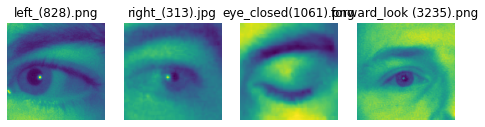

In [ ]:
from tensorflow.keras import models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

# The images are in the data/shapes folder
data_folder = '/content/drive/MyDrive/TFM/dataset/train_dataset'

# Get the class names
classes = os.listdir(data_folder)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(8, 20))
i = 0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

In [ ]:
model_cnn.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (320, 320)
batch_size = 32

data_folder_train = "/content/drive/MyDrive/TFM/dataset/train_dataset/"
data_folder_val = "/content/drive/MyDrive/TFM/dataset/val_dataset/"

print("Getting Data...")
datagen_train = ImageDataGenerator(rescale=1./255, # normalize pixel values
                              rotation_range=20,
                              zoom_range=0.1,
                              width_shift_range=0.15,
                              height_shift_range=0.15,
                              horizontal_flip=False,
                              vertical_flip=False)

print("Preparing training dataset...")
train_generator = datagen_train.flow_from_directory(
    data_folder_train,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

datagen_val = ImageDataGenerator(rescale=1./255, # normalize pixel values
                               )

print("Preparing validation dataset...")
validation_generator = datagen_val.flow_from_directory(
    data_folder_val,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical')

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting Data...
Preparing training dataset...
Found 13821 images belonging to 4 classes.
Preparing validation dataset...
Found 1439 images belonging to 4 classes.
Data generators ready


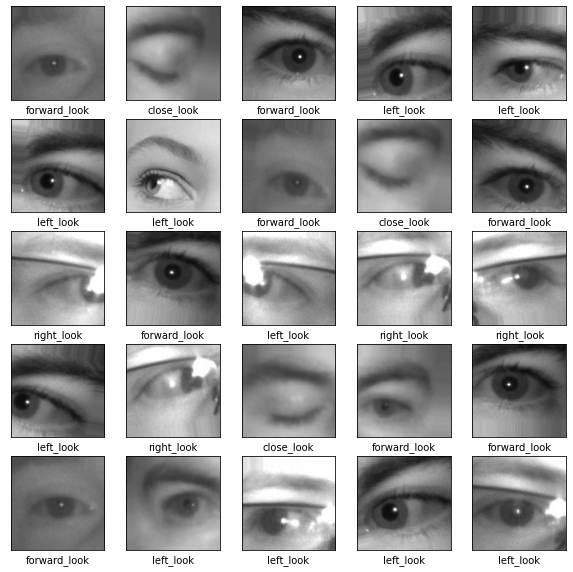

In [ ]:
classes = os.listdir(data_folder)
classes.sort()
# Visualización total o parcial de los datos
plt.figure(figsize=(10,10))
for imagen, etiqueta in validation_generator:
  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(224, 224, 3))
    plt.xlabel(classes[np.argmax(etiqueta[i])]) 
  break

In [ ]:
# Train the model over 25 epochs using 32-image batches and using the validation holdout dataset for validation
num_epochs = 25
history = model_cnn.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/25
863/863 [==============================] - 3781s 4s/step - loss: 0.9866 - accuracy: 0.5602 - val_loss: 0.6966 - val_accuracy: 0.7500
Epoch 2/25
863/863 [==============================] - 322s 373ms/step - loss: 0.5072 - accuracy: 0.8144 - val_loss: 0.3373 - val_accuracy: 0.8862
Epoch 3/25
863/863 [==============================] - 318s 369ms/step - loss: 0.2947 - accuracy: 0.9003 - val_loss: 0.2550 - val_accuracy: 0.9185
Epoch 4/25
863/863 [==============================] - 320s 371ms/step - loss: 0.2101 - accuracy: 0.9325 - val_loss: 0.1951 - val_accuracy: 0.9326
Epoch 5/25
863/863 [==============================] - 320s 371ms/step - loss: 0.1728 - accuracy: 0.9449 - val_loss: 0.1899 - val_accuracy: 0.9403
Epoch 6/25
863/863 [==============================] - 320s 371ms/step - loss: 0.1521 - accuracy: 0.9521 - val_loss: 0.0800 - val_accuracy: 0.9796
Epoch 7/25
863/863 [==============================] - 322s 373ms/step - loss: 0.1277 - accuracy: 0.9586 - val_loss: 0.0741 - v

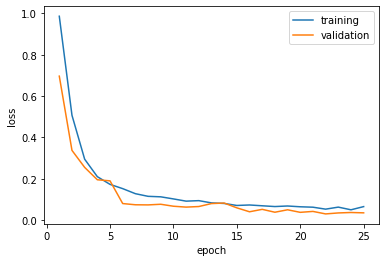

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

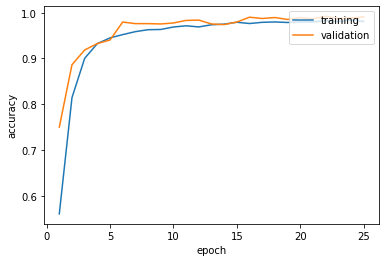

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...
1/1 [==============================] - 0s 125ms/step


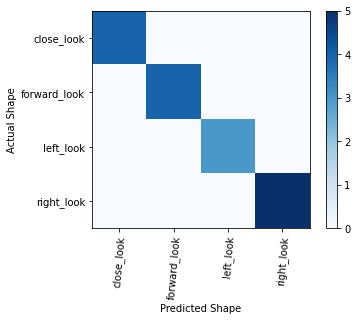

In [ ]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model_cnn.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

In [ ]:
export_dir = 'drive/MyDrive/ModelosGuardados/model_cnn'
tf.keras.models.save_model(model_cnn, filepath=export_dir)
model_cnn.save("drive/MyDrive/ModelosGuardados/model_cnn.h5")

In [ ]:
import pandas as pd

In [ ]:
hist_csv_file = '/content/drive/MyDrive/TFM/history_cnn.csv'
hist_df = pd.read_csv(hist_csv_file)

In [ ]:
# Código para cargar una red entrenada desde nuestro equipo al sevidor de Google Colab
from google.colab import files
model_cnn = tf.keras.models.load_model('drive/MyDrive/ModelosGuardados/model_cnn')
model_cnn

In [ ]:
num_epochs = 25
hist_csv_file = '/content/drive/MyDrive/TFM/history_cnn.csv'
hist_df = pd.read_csv(hist_csv_file)
# Código para el entrenamiento del modelo
# TODO (debe ejecutar el entrenamiento del modelo el número de épocas previstas e ir guardando el modelo cada vez que se mejoran las métricas o los valores de pérdida en el conjunto de validación)
max_val_accuracy =  0.9909
min_val_loss =  0.0350
for e in range(num_epochs):
  hist_df = pd.read_csv(hist_csv_file)
  print("Epoca ", len(hist_df)+1, ": \t")
  history = model_cnn.fit(train_generator , epochs=1, validation_data = validation_generator , batch_size=32)
  hist_df_loop = pd.DataFrame(history.history)
  hist_df_loop["Epoc"] = len(hist_df)
  hist_df = hist_df.append(hist_df_loop)
  with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
  if history.history['val_accuracy'][0] > max_val_accuracy or (history.history['val_accuracy'][0] == max_val_accuracy and history.history['val_loss'][0] < min_val_loss):
    export_dir = 'drive/MyDrive/ModelosGuardados/model_cnn'
    tf.keras.models.save_model(model_cnn, filepath=export_dir)
    model_cnn.save("drive/MyDrive/ModelosGuardados/model_cnn.h5")
    max_val_accuracy = history.history['val_accuracy'][0]
    min_val_loss = history.history['val_loss'][0]
    print("Nuevo máximo accuracy: ", max_val_accuracy, "\n Nuevo mínimo loss: ", min_val_loss)

Epoca  26 : 	
864/864 [==============================] - 321s 372ms/step - loss: 0.0499 - accuracy: 0.9842 - val_loss: 0.0411 - val_accuracy: 0.9917


Nuevo máximo accuracy:  0.9916608929634094 
 Nuevo mínimo loss:  0.041114501655101776
Epoca  27 : 	
864/864 [==============================] - 319s 369ms/step - loss: 0.0510 - accuracy: 0.9844 - val_loss: 0.0509 - val_accuracy: 0.9847
Epoca  28 : 	
864/864 [==============================] - 320s 370ms/step - loss: 0.0457 - accuracy: 0.9863 - val_loss: 0.0286 - val_accuracy: 0.9917


Nuevo máximo accuracy:  0.9916608929634094 
 Nuevo mínimo loss:  0.028638334944844246
Epoca  29 : 	
864/864 [==============================] - 318s 368ms/step - loss: 0.0473 - accuracy: 0.9852 - val_loss: 0.0415 - val_accuracy: 0.9868
Epoca  30 : 	
778/864 [==========================>...] - ETA: 31s - loss: 0.0444 - accuracy: 0.9860

In [ ]:
num_epochs = 25
hist_csv_file = '/content/drive/MyDrive/TFM/history_cnn.csv'
hist_df = pd.read_csv(hist_csv_file)
# Código para el entrenamiento del modelo
# TODO (debe ejecutar el entrenamiento del modelo el número de épocas previstas e ir guardando el modelo cada vez que se mejoran las métricas o los valores de pérdida en el conjunto de validación)
max_val_accuracy =  0.9916
min_val_loss =  0.0286
for e in range(num_epochs):
  hist_df = pd.read_csv(hist_csv_file)
  print("Epoca ", len(hist_df)+1, ": \t")
  history = model_cnn.fit(train_generator , epochs=1, validation_data = validation_generator , batch_size=32)
  hist_df_loop = pd.DataFrame(history.history)
  hist_df_loop["Epoc"] = len(hist_df)
  hist_df = hist_df.append(hist_df_loop)
  with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
  if history.history['val_accuracy'][0] > max_val_accuracy or (history.history['val_accuracy'][0] == max_val_accuracy and history.history['val_loss'][0] < min_val_loss):
    export_dir = 'drive/MyDrive/ModelosGuardados/model_cnn'
    tf.keras.models.save_model(model_cnn, filepath=export_dir)
    model_cnn.save("drive/MyDrive/ModelosGuardados/model_cnn.h5")
    max_val_accuracy = history.history['val_accuracy'][0]
    min_val_loss = history.history['val_loss'][0]
    print("Nuevo máximo accuracy: ", max_val_accuracy, "\n Nuevo mínimo loss: ", min_val_loss)

Epoca  29 : 	
864/864 [==============================] - 4097s 5s/step - loss: 0.0493 - accuracy: 0.9854 - val_loss: 0.0400 - val_accuracy: 0.9896
Epoca  30 : 	
864/864 [==============================] - 324s 375ms/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.0331 - val_accuracy: 0.9903
Epoca  31 : 	
864/864 [==============================] - 321s 371ms/step - loss: 0.0468 - accuracy: 0.9859 - val_loss: 0.0358 - val_accuracy: 0.9917


Nuevo máximo accuracy:  0.9916608929634094 
 Nuevo mínimo loss:  0.035779427736997604
Epoca  32 : 	
864/864 [==============================] - 321s 371ms/step - loss: 0.0427 - accuracy: 0.9870 - val_loss: 0.0378 - val_accuracy: 0.9903
Epoca  33 : 	
864/864 [==============================] - 321s 371ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0307 - val_accuracy: 0.9910
Epoca  34 : 	
864/864 [==============================] - 320s 370ms/step - loss: 0.0406 - accuracy: 0.9866 - val_loss: 0.0296 - val_accuracy: 0.9896
Epoca  35 : 	
864/864 [==============================] - 317s 367ms/step - loss: 0.0443 - accuracy: 0.9857 - val_loss: 0.0299 - val_accuracy: 0.9896
Epoca  36 : 	
864/864 [==============================] - 315s 364ms/step - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0217 - val_accuracy: 0.9937


Nuevo máximo accuracy:  0.9937456846237183 
 Nuevo mínimo loss:  0.02165166102349758
Epoca  37 : 	
864/864 [==============================] - 320s 370ms/step - loss: 0.0386 - accuracy: 0.9870 - val_loss: 0.0302 - val_accuracy: 0.9924
Epoca  38 : 	
864/864 [==============================] - 319s 369ms/step - loss: 0.0428 - accuracy: 0.9869 - val_loss: 0.0249 - val_accuracy: 0.9924
Epoca  39 : 	
864/864 [==============================] - 319s 369ms/step - loss: 0.0397 - accuracy: 0.9871 - val_loss: 0.0251 - val_accuracy: 0.9924
Epoca  40 : 	
864/864 [==============================] - 317s 367ms/step - loss: 0.0373 - accuracy: 0.9881 - val_loss: 0.0248 - val_accuracy: 0.9931
Epoca  41 : 	
864/864 [==============================] - 320s 371ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0261 - val_accuracy: 0.9931
Epoca  42 : 	
864/864 [==============================] - 320s 370ms/step - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.0291 - val_accuracy: 0.9903
Epoca  43 : 	
864/864

In [ ]:
hist_csv_file = '/content/drive/MyDrive/TFM/history_cnn.csv'
hist_df = pd.read_csv(hist_csv_file, sep = ";")

In [ ]:
hist_df.head()

,loss,accuracy,val_loss,val_accuracy,Epoc
0,0.986581,0.560232,0.696615,0.750000,0.0
1,0.507217,0.814415,0.337321,0.886236,1.0
2,0.294686,0.900254,0.255042,0.918539,2.0
3,0.210108,0.932488,0.195125,0.932584,3.0
4,0.172812,0.944947,0.189873,0.940309,4.0


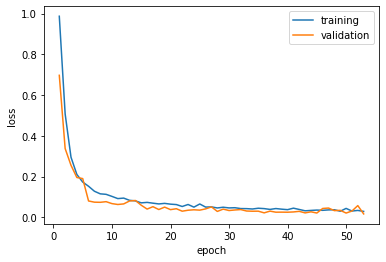

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,len(hist_df)+1)
training_loss = hist_df["loss"]
validation_loss = hist_df["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

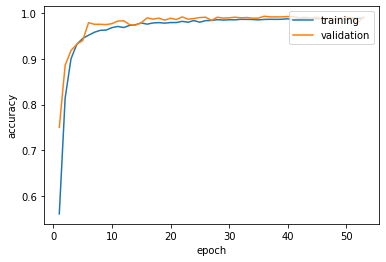

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,len(hist_df)+1)
training_accuracy = hist_df["accuracy"]
validation_accuracy = hist_df["val_accuracy"]
plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...
1/1 [==============================] - 0s 138ms/step


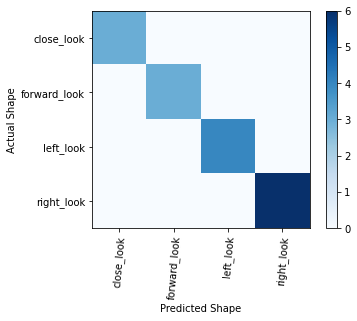

In [ ]:
model_cnn = tf.keras.models.load_model('drive/MyDrive/ModelosGuardados/model_cnn')

# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model_cnn.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

In [ ]:
num_epochs = 17
hist_csv_file = '/content/drive/MyDrive/TFM/history_cnn.csv'
hist_df = pd.read_csv(hist_csv_file)
# Código para el entrenamiento del modelo
# TODO (debe ejecutar el entrenamiento del modelo el número de épocas previstas e ir guardando el modelo cada vez que se mejoran las métricas o los valores de pérdida en el conjunto de validación)
max_val_accuracy =  0.9937
min_val_loss =  0.02165
for e in range(num_epochs):
  hist_df = pd.read_csv(hist_csv_file, sep = ";")
  print("Epoca ", len(hist_df)+1, ": \t")
  history = model_cnn.fit(train_generator , epochs=1, validation_data = validation_generator , batch_size=32)
  hist_df_loop = pd.DataFrame(history.history)
  hist_df_loop["Epoc"] = len(hist_df)
  hist_df = hist_df.append(hist_df_loop)
  with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
  if history.history['val_accuracy'][0] > max_val_accuracy or (history.history['val_accuracy'][0] == max_val_accuracy and history.history['val_loss'][0] < min_val_loss):
    export_dir = 'drive/MyDrive/ModelosGuardados/model_cnn'
    tf.keras.models.save_model(model_cnn, filepath=export_dir)
    model_cnn.save("drive/MyDrive/ModelosGuardados/model_cnn.h5")
    max_val_accuracy = history.history['val_accuracy'][0]
    min_val_loss = history.history['val_loss'][0]
    print("Nuevo máximo accuracy: ", max_val_accuracy, "\n Nuevo mínimo loss: ", min_val_loss)

Epoca  54 : 	
864/864 [==============================] - 327s 377ms/step - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0.0359 - val_accuracy: 0.9896
Epoca  55 : 	
864/864 [==============================] - 327s 379ms/step - loss: 0.0408 - accuracy: 0.9870 - val_loss: 0.0270 - val_accuracy: 0.9931
Epoca  56 : 	
864/864 [==============================] - 328s 380ms/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0271 - val_accuracy: 0.9903
Epoca  57 : 	
864/864 [==============================] - 325s 376ms/step - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0236 - val_accuracy: 0.9937


Nuevo máximo accuracy:  0.9937456846237183 
 Nuevo mínimo loss:  0.023608848452568054
Epoca  58 : 	
864/864 [==============================] - 324s 375ms/step - loss: 0.0409 - accuracy: 0.9860 - val_loss: 0.0384 - val_accuracy: 0.9875
Epoca  59 : 	
864/864 [==============================] - 327s 379ms/step - loss: 0.0347 - accuracy: 0.9883 - val_loss: 0.0270 - val_accuracy: 0.9924
Epoca  60 : 	
864/864 [==============================] - 323s 373ms/step - loss: 0.0383 - accuracy: 0.9872 - val_loss: 0.0347 - val_accuracy: 0.9903
Epoca  61 : 	
864/864 [==============================] - 324s 375ms/step - loss: 0.0352 - accuracy: 0.9894 - val_loss: 0.0299 - val_accuracy: 0.9903
Epoca  62 : 	
864/864 [==============================] - 322s 373ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0214 - val_accuracy: 0.9937


Nuevo máximo accuracy:  0.9937456846237183 
 Nuevo mínimo loss:  0.02135475166141987
Epoca  63 : 	
864/864 [==============================] - 322s 373ms/step - loss: 0.0335 - accuracy: 0.9896 - val_loss: 0.0376 - val_accuracy: 0.9861
Epoca  64 : 	
864/864 [==============================] - 323s 374ms/step - loss: 0.0347 - accuracy: 0.9882 - val_loss: 0.0266 - val_accuracy: 0.9903
Epoca  65 : 	
864/864 [==============================] - 323s 373ms/step - loss: 0.0342 - accuracy: 0.9887 - val_loss: 0.0256 - val_accuracy: 0.9896
Epoca  66 : 	
864/864 [==============================] - 325s 376ms/step - loss: 0.0358 - accuracy: 0.9888 - val_loss: 0.0209 - val_accuracy: 0.9931
Epoca  67 : 	
864/864 [==============================] - 322s 372ms/step - loss: 0.0335 - accuracy: 0.9883 - val_loss: 0.0197 - val_accuracy: 0.9937


Nuevo máximo accuracy:  0.9937456846237183 
 Nuevo mínimo loss:  0.019717196002602577
Epoca  68 : 	
864/864 [==============================] - 324s 375ms/step - loss: 0.0330 - accuracy: 0.9885 - val_loss: 0.0350 - val_accuracy: 0.9896
Epoca  69 : 	
864/864 [==============================] - 326s 378ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0182 - val_accuracy: 0.9944


Nuevo máximo accuracy:  0.9944405555725098 
 Nuevo mínimo loss:  0.01817418448626995
Epoca  70 : 	
864/864 [==============================] - 330s 382ms/step - loss: 0.0336 - accuracy: 0.9881 - val_loss: 0.0208 - val_accuracy: 0.9931


In [ ]:
hist_csv_file = '/content/drive/MyDrive/TFM/history_cnn.csv'
hist_df = pd.read_csv(hist_csv_file, sep = ";")

In [ ]:
print(hist_df)

        loss  accuracy  val_loss  val_accuracy  Epoc
0   0.986581  0.560232  0.696615      0.750000   0.0
1   0.507217  0.814415  0.337321      0.886236   1.0
2   0.294686  0.900254  0.255042      0.918539   2.0
3   0.210108  0.932488  0.195125      0.932584   3.0
4   0.172812  0.944947  0.189873      0.940309   4.0
..       ...       ...       ...           ...   ...
65  0.035762  0.988785  0.020899      0.993051  65.0
66  0.033524  0.988279  0.019717      0.993746  66.0
67  0.032951  0.988496  0.035046      0.989576  67.0
68  0.029906  0.990377  0.018174      0.994441  68.0
69  0.033597  0.988062  0.020783      0.993051  69.0

[70 rows x 5 columns]


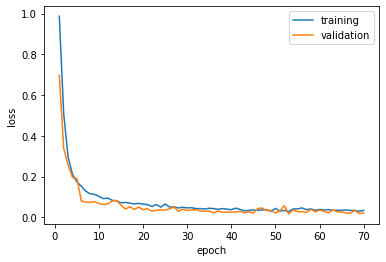

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,len(hist_df)+1)
training_loss = hist_df["loss"]
validation_loss = hist_df["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

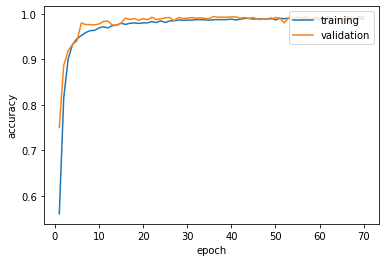

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,len(hist_df)+1)
training_accuracy = hist_df["accuracy"]
validation_accuracy = hist_df["val_accuracy"]
plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...
1/1 [==============================] - 7s 7s/step


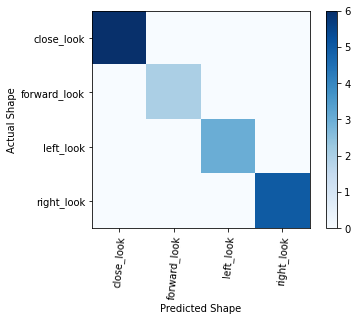

In [ ]:
model_cnn = tf.keras.models.load_model('drive/MyDrive/ModelosGuardados/model_cnn')

# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model_cnn.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

In [ ]:
model_cnn = tf.keras.models.load_model('drive/MyDrive/ModelosGuardados/model_cnn')


In [ ]:
num_epochs = 20
hist_csv_file = '/content/drive/MyDrive/TFM/history_cnn.csv'
hist_df = pd.read_csv(hist_csv_file)
# Código para el entrenamiento del modelo
# TODO (debe ejecutar el entrenamiento del modelo el número de épocas previstas e ir guardando el modelo cada vez que se mejoran las métricas o los valores de pérdida en el conjunto de validación)
max_val_accuracy =  0.9944
min_val_loss =  0.01817
for e in range(num_epochs):
  hist_df = pd.read_csv(hist_csv_file, sep = ";")
  print("Epoca ", len(hist_df)+1, ": \t")
  history = model_cnn.fit(train_generator , epochs=1, validation_data = validation_generator , batch_size=32)
  hist_df_loop = pd.DataFrame(history.history)
  hist_df_loop["Epoc"] = len(hist_df)
  hist_df = hist_df.append(hist_df_loop)
  hist_df.to_csv('/content/drive/MyDrive/TFM/history_cnn_bis.csv', sep = ";")
  if history.history['val_accuracy'][0] > max_val_accuracy or (history.history['val_accuracy'][0] == max_val_accuracy and history.history['val_loss'][0] < min_val_loss):
    export_dir = 'drive/MyDrive/ModelosGuardados/model_cnn'
    tf.keras.models.save_model(model_cnn, filepath=export_dir)
    model_cnn.save("drive/MyDrive/ModelosGuardados/model_cnn.h5")
    max_val_accuracy = history.history['val_accuracy'][0]
    min_val_loss = history.history['val_loss'][0]
    print("Nuevo máximo accuracy: ", max_val_accuracy, "\n Nuevo mínimo loss: ", min_val_loss)

Epoca  71 : 	
864/864 [==============================] - 8065s 9s/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.0204 - val_accuracy: 0.9910
Epoca  71 : 	
864/864 [==============================] - 329s 380ms/step - loss: 0.0328 - accuracy: 0.9888 - val_loss: 0.0167 - val_accuracy: 0.9944


Nuevo máximo accuracy:  0.9944405555725098 
 Nuevo mínimo loss:  0.016678985208272934
Epoca  71 : 	
864/864 [==============================] - 325s 376ms/step - loss: 0.0322 - accuracy: 0.9894 - val_loss: 0.0167 - val_accuracy: 0.9951


Nuevo máximo accuracy:  0.995135486125946 
 Nuevo mínimo loss:  0.016726918518543243
Epoca  71 : 	
327/864 [==========>...................] - ETA: 3:19 - loss: 0.0262 - accuracy: 0.9916

KeyboardInterrupt: ignored

In [ ]:
num_epochs = 19
hist_csv_file = '/content/drive/MyDrive/TFM/history_cnn.csv'
hist_df = pd.read_csv(hist_csv_file)
# Código para el entrenamiento del modelo
# TODO (debe ejecutar el entrenamiento del modelo el número de épocas previstas e ir guardando el modelo cada vez que se mejoran las métricas o los valores de pérdida en el conjunto de validación)
max_val_accuracy =  0.99513
min_val_loss =  0.01672
for e in range(num_epochs):
  hist_df = pd.read_csv(hist_csv_file, sep = ";")
  print("Epoca ", len(hist_df)+1, ": \t")
  history = model_cnn.fit(train_generator , epochs=1, validation_data = validation_generator , batch_size=32)
  hist_df_loop = pd.DataFrame(history.history)
  hist_df_loop["Epoc"] = len(hist_df)
  hist_df = hist_df.append(hist_df_loop)
  hist_df.to_csv(hist_csv_file, sep = ";")
  if history.history['val_accuracy'][0] > max_val_accuracy or (history.history['val_accuracy'][0] == max_val_accuracy and history.history['val_loss'][0] < min_val_loss):
    export_dir = 'drive/MyDrive/ModelosGuardados/model_cnn'
    tf.keras.models.save_model(model_cnn, filepath=export_dir)
    model_cnn.save("drive/MyDrive/ModelosGuardados/model_cnn.h5")
    max_val_accuracy = history.history['val_accuracy'][0]
    min_val_loss = history.history['val_loss'][0]
    print("Nuevo máximo accuracy: ", max_val_accuracy, "\n Nuevo mínimo loss: ", min_val_loss)

Epoca  72 : 	
864/864 [==============================] - 326s 378ms/step - loss: 0.0352 - accuracy: 0.9881 - val_loss: 0.0204 - val_accuracy: 0.9924
Epoca  73 : 	
864/864 [==============================] - 322s 373ms/step - loss: 0.0246 - accuracy: 0.9917 - val_loss: 0.0170 - val_accuracy: 0.9937
Epoca  74 : 	
864/864 [==============================] - 323s 374ms/step - loss: 0.0302 - accuracy: 0.9897 - val_loss: 0.0207 - val_accuracy: 0.9937
Epoca  75 : 	
864/864 [==============================] - 324s 374ms/step - loss: 0.0277 - accuracy: 0.9903 - val_loss: 0.0170 - val_accuracy: 0.9931
Epoca  76 : 	
864/864 [==============================] - 323s 373ms/step - loss: 0.0314 - accuracy: 0.9897 - val_loss: 0.0184 - val_accuracy: 0.9937
Epoca  77 : 	
864/864 [==============================] - 322s 373ms/step - loss: 0.0226 - accuracy: 0.9920 - val_loss: 0.0184 - val_accuracy: 0.9951


Nuevo máximo accuracy:  0.995135486125946 
 Nuevo mínimo loss:  0.018441013991832733
Epoca  78 : 	
864/864 [==============================] - 324s 375ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0183 - val_accuracy: 0.9951


Nuevo máximo accuracy:  0.995135486125946 
 Nuevo mínimo loss:  0.018287282437086105
Epoca  79 : 	
864/864 [==============================] - 321s 371ms/step - loss: 0.0340 - accuracy: 0.9879 - val_loss: 0.0189 - val_accuracy: 0.9937
Epoca  80 : 	
864/864 [==============================] - 327s 378ms/step - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.0196 - val_accuracy: 0.9917
Epoca  81 : 	
864/864 [==============================] - 403s 466ms/step - loss: 0.0270 - accuracy: 0.9910 - val_loss: 0.0235 - val_accuracy: 0.9917
Epoca  82 : 	
864/864 [==============================] - 467s 541ms/step - loss: 0.0280 - accuracy: 0.9902 - val_loss: 0.0202 - val_accuracy: 0.9903
Epoca  83 : 	
864/864 [==============================] - 466s 539ms/step - loss: 0.0256 - accuracy: 0.9907 - val_loss: 0.0184 - val_accuracy: 0.9937
Epoca  84 : 	
864/864 [==============================] - 399s 461ms/step - loss: 0.0264 - accuracy: 0.9907 - val_loss: 0.0191 - val_accuracy: 0.9931
Epoca  85 : 	
864/864

Nuevo máximo accuracy:  0.9958304166793823 
 Nuevo mínimo loss:  0.013590131886303425
Epoca  86 : 	
726/864 [========================>.....] - ETA: 51s - loss: 0.0222 - accuracy: 0.9920

In [ ]:
num_epochs = 15
hist_csv_file = '/content/drive/MyDrive/TFM/history_cnn.csv'
# Código para el entrenamiento del modelo
# TODO (debe ejecutar el entrenamiento del modelo el número de épocas previstas e ir guardando el modelo cada vez que se mejoran las métricas o los valores de pérdida en el conjunto de validación)
max_val_accuracy =  0.99513
min_val_loss =  0.01672
for e in range(num_epochs):
  hist_df = pd.read_csv(hist_csv_file, sep = ";")
  print("Epoca ", len(hist_df)+1, ": \t")
  history = model_cnn.fit(train_generator , epochs=1, validation_data = validation_generator , batch_size=32)
  hist_df_loop = pd.DataFrame(history.history)
  hist_df_loop["Epoc"] = len(hist_df)
  hist_df = hist_df.append(hist_df_loop)
  hist_df.to_csv(hist_csv_file, sep = ";")
  if history.history['val_accuracy'][0] > max_val_accuracy or (history.history['val_accuracy'][0] == max_val_accuracy and history.history['val_loss'][0] < min_val_loss):
    export_dir = 'drive/MyDrive/ModelosGuardados/model_cnn'
    tf.keras.models.save_model(model_cnn, filepath=export_dir)
    model_cnn.save("drive/MyDrive/ModelosGuardados/model_cnn.h5")
    max_val_accuracy = history.history['val_accuracy'][0]
    min_val_loss = history.history['val_loss'][0]
    print("Nuevo máximo accuracy: ", max_val_accuracy, "\n Nuevo mínimo loss: ", min_val_loss)

Epoca  86 : 	
864/864 [==============================] - 10579s 12s/step - loss: 0.0284 - accuracy: 0.9915 - val_loss: 0.0169 - val_accuracy: 0.9944
Epoca  87 : 	
864/864 [==============================] - 318s 367ms/step - loss: 0.0224 - accuracy: 0.9922 - val_loss: 0.0120 - val_accuracy: 0.9944
Epoca  88 : 	
864/864 [==============================] - 317s 366ms/step - loss: 0.0234 - accuracy: 0.9921 - val_loss: 0.0214 - val_accuracy: 0.9937
Epoca  89 : 	
864/864 [==============================] - 317s 367ms/step - loss: 0.0249 - accuracy: 0.9917 - val_loss: 0.0221 - val_accuracy: 0.9924
Epoca  90 : 	
864/864 [==============================] - 314s 364ms/step - loss: 0.0246 - accuracy: 0.9918 - val_loss: 0.0185 - val_accuracy: 0.9931
Epoca  91 : 	
864/864 [==============================] - 314s 363ms/step - loss: 0.0248 - accuracy: 0.9904 - val_loss: 0.0151 - val_accuracy: 0.9931
Epoca  92 : 	
864/864 [==============================] - 312s 361ms/step - loss: 0.0274 - accuracy: 0.9903

Nuevo máximo accuracy:  0.9958304166793823 
 Nuevo mínimo loss:  0.013020534999668598
Epoca  93 : 	
864/864 [==============================] - 311s 360ms/step - loss: 0.0396 - accuracy: 0.9896 - val_loss: 0.0145 - val_accuracy: 0.9931
Epoca  94 : 	
864/864 [==============================] - 313s 362ms/step - loss: 0.0234 - accuracy: 0.9915 - val_loss: 0.0154 - val_accuracy: 0.9944
Epoca  95 : 	
864/864 [==============================] - 311s 360ms/step - loss: 0.0226 - accuracy: 0.9918 - val_loss: 0.0095 - val_accuracy: 0.9965


Nuevo máximo accuracy:  0.9965253472328186 
 Nuevo mínimo loss:  0.009463015012443066
Epoca  96 : 	
864/864 [==============================] - 311s 360ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0240 - val_accuracy: 0.9882
Epoca  97 : 	
864/864 [==============================] - 313s 362ms/step - loss: 0.0205 - accuracy: 0.9918 - val_loss: 0.0218 - val_accuracy: 0.9910
Epoca  98 : 	
864/864 [==============================] - 313s 362ms/step - loss: 0.0194 - accuracy: 0.9939 - val_loss: 0.0167 - val_accuracy: 0.9931
Epoca  99 : 	
864/864 [==============================] - 311s 360ms/step - loss: 0.0236 - accuracy: 0.9920 - val_loss: 0.0121 - val_accuracy: 0.9951
Epoca  100 : 	
864/864 [==============================] - 310s 359ms/step - loss: 0.0220 - accuracy: 0.9917 - val_loss: 0.0102 - val_accuracy: 0.9951


In [ ]:
num_epochs = 10
hist_csv_file = '/content/drive/MyDrive/TFM/history_cnn.csv'
# Código para el entrenamiento del modelo
# TODO (debe ejecutar el entrenamiento del modelo el número de épocas previstas e ir guardando el modelo cada vez que se mejoran las métricas o los valores de pérdida en el conjunto de validación)
max_val_accuracy =  0.99513
min_val_loss =  0.01672
for e in range(num_epochs):
  hist_df = pd.read_csv(hist_csv_file, sep = ";")
  print("Epoca ", len(hist_df)+1, ": \t")
  history = model_cnn.fit(train_generator , epochs=1, validation_data = validation_generator , batch_size=32)
  hist_df_loop = pd.DataFrame(history.history)
  hist_df_loop["Epoc"] = len(hist_df)
  hist_df = hist_df.append(hist_df_loop)
  hist_df.to_csv(hist_csv_file, sep = ";")
  if history.history['val_accuracy'][0] > max_val_accuracy or (history.history['val_accuracy'][0] == max_val_accuracy and history.history['val_loss'][0] < min_val_loss):
    export_dir = 'drive/MyDrive/ModelosGuardados/model_cnn'
    tf.keras.models.save_model(model_cnn, filepath=export_dir)
    model_cnn.save("drive/MyDrive/ModelosGuardados/model_cnn.h5")
    max_val_accuracy = history.history['val_accuracy'][0]
    min_val_loss = history.history['val_loss'][0]
    print("Nuevo máximo accuracy: ", max_val_accuracy, "\n Nuevo mínimo loss: ", min_val_loss)

Epoca  101 : 	
864/864 [==============================] - 310s 358ms/step - loss: 0.0231 - accuracy: 0.9922 - val_loss: 0.0111 - val_accuracy: 0.9958


Nuevo máximo accuracy:  0.9958304166793823 
 Nuevo mínimo loss:  0.011085404083132744
Epoca  102 : 	
864/864 [==============================] - 310s 359ms/step - loss: 0.0228 - accuracy: 0.9916 - val_loss: 0.0147 - val_accuracy: 0.9937
Epoca  103 : 	
864/864 [==============================] - 312s 361ms/step - loss: 0.0226 - accuracy: 0.9917 - val_loss: 0.0116 - val_accuracy: 0.9944
Epoca  104 : 	
864/864 [==============================] - 311s 360ms/step - loss: 0.0218 - accuracy: 0.9931 - val_loss: 0.0148 - val_accuracy: 0.9958
Epoca  105 : 	
864/864 [==============================] - 310s 359ms/step - loss: 0.0214 - accuracy: 0.9926 - val_loss: 0.0149 - val_accuracy: 0.9931
Epoca  106 : 	
864/864 [==============================] - 311s 360ms/step - loss: 0.0271 - accuracy: 0.9901 - val_loss: 0.0122 - val_accuracy: 0.9937
Epoca  107 : 	
864/864 [==============================] - 311s 359ms/step - loss: 0.0179 - accuracy: 0.9936 - val_loss: 0.0127 - val_accuracy: 0.9937
Epoca  108 : 	

Nuevo máximo accuracy:  0.9958304166793823 
 Nuevo mínimo loss:  0.009792100638151169
Epoca  110 : 	
864/864 [==============================] - 310s 359ms/step - loss: 0.0186 - accuracy: 0.9936 - val_loss: 0.0132 - val_accuracy: 0.9944


In [ ]:
num_epochs = 20
hist_csv_file = '/content/drive/MyDrive/TFM/history_cnn.csv'
# Código para el entrenamiento del modelo
# TODO (debe ejecutar el entrenamiento del modelo el número de épocas previstas e ir guardando el modelo cada vez que se mejoran las métricas o los valores de pérdida en el conjunto de validación)
max_val_accuracy =  0.99583
min_val_loss =  0.00979
for e in range(num_epochs):
  hist_df = pd.read_csv(hist_csv_file, sep = ";")
  print("Epoca ", len(hist_df)+1, ": \t")
  history = model_cnn.fit(train_generator , epochs=1, validation_data = validation_generator , batch_size=32)
  hist_df_loop = pd.DataFrame(history.history)
  hist_df_loop["Epoc"] = len(hist_df)
  hist_df = hist_df.append(hist_df_loop)
  hist_df.to_csv(hist_csv_file, sep = ";")
  if history.history['val_accuracy'][0] > max_val_accuracy or (history.history['val_accuracy'][0] == max_val_accuracy and history.history['val_loss'][0] < min_val_loss):
    export_dir = 'drive/MyDrive/ModelosGuardados/model_cnn'
    tf.keras.models.save_model(model_cnn, filepath=export_dir)
    model_cnn.save("drive/MyDrive/ModelosGuardados/model_cnn.h5")
    max_val_accuracy = history.history['val_accuracy'][0]
    min_val_loss = history.history['val_loss'][0]
    print("Nuevo máximo accuracy: ", max_val_accuracy, "\n Nuevo mínimo loss: ", min_val_loss)

Epoca  111 : 	
432/432 [==============================] - 10226s 24s/step - loss: 0.0174 - accuracy: 0.9939 - val_loss: 0.0148 - val_accuracy: 0.9944
Epoca  112 : 	
432/432 [==============================] - 324s 749ms/step - loss: 0.0166 - accuracy: 0.9943 - val_loss: 0.0096 - val_accuracy: 0.9958


Nuevo máximo accuracy:  0.9958304166793823 
 Nuevo mínimo loss:  0.009554270654916763
Epoca  113 : 	
432/432 [==============================] - 321s 742ms/step - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.0135 - val_accuracy: 0.9937
Epoca  114 : 	
432/432 [==============================] - 319s 737ms/step - loss: 0.0163 - accuracy: 0.9935 - val_loss: 0.0083 - val_accuracy: 0.9972


Nuevo máximo accuracy:  0.9972202777862549 
 Nuevo mínimo loss:  0.008335553109645844
Epoca  115 : 	
384/432 [=========================>....] - ETA: 34s - loss: 0.0099 - accuracy: 0.9966

In [ ]:
model_cnn = tf.keras.models.load_model('/content/drive/MyDrive/ModelosGuardados/model_cnn.h5')

In [ ]:
num_epochs = 20
hist_csv_file = '/content/drive/MyDrive/TFM/history_cnn.csv'
# Código para el entrenamiento del modelo
# TODO (debe ejecutar el entrenamiento del modelo el número de épocas previstas e ir guardando el modelo cada vez que se mejoran las métricas o los valores de pérdida en el conjunto de validación)
max_val_accuracy = 0.9972202777862549
min_val_loss =  0.008335553109645844
for e in range(num_epochs):
  hist_df = pd.read_csv(hist_csv_file, sep = ";")
  print("Epoca ", len(hist_df)+1, ": \t")
  history = model_cnn.fit(train_generator , epochs=1, validation_data = validation_generator , batch_size=32)
  hist_df_loop = pd.DataFrame(history.history)
  hist_df_loop["Epoc"] = len(hist_df)
  hist_df = hist_df.append(hist_df_loop)
  hist_df.to_csv(hist_csv_file, sep = ";")
  if history.history['val_accuracy'][0] > max_val_accuracy or (history.history['val_accuracy'][0] == max_val_accuracy and history.history['val_loss'][0] < min_val_loss):
    export_dir = 'drive/MyDrive/ModelosGuardados/model_cnn'
    tf.keras.models.save_model(model_cnn, filepath=export_dir)
    model_cnn.save("drive/MyDrive/ModelosGuardados/model_cnn.h5")
    max_val_accuracy = history.history['val_accuracy'][0]
    min_val_loss = history.history['val_loss'][0]
    print("Nuevo máximo accuracy: ", max_val_accuracy, "\n Nuevo mínimo loss: ", min_val_loss)

Epoca  116 : 	
432/432 [==============================] - 8334s 19s/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0092 - val_accuracy: 0.9951
Epoca  117 : 	
432/432 [==============================] - 336s 778ms/step - loss: 0.0159 - accuracy: 0.9938 - val_loss: 0.0147 - val_accuracy: 0.9937
Epoca  118 : 	
432/432 [==============================] - 333s 770ms/step - loss: 0.0164 - accuracy: 0.9941 - val_loss: 0.0130 - val_accuracy: 0.9965
Epoca  119 : 	
432/432 [==============================] - 331s 765ms/step - loss: 0.0152 - accuracy: 0.9945 - val_loss: 0.0139 - val_accuracy: 0.9951
Epoca  120 : 	
432/432 [==============================] - 328s 759ms/step - loss: 0.0135 - accuracy: 0.9951 - val_loss: 0.0130 - val_accuracy: 0.9937
Epoca  121 : 	
432/432 [==============================] - 331s 766ms/step - loss: 0.0278 - accuracy: 0.9925 - val_loss: 0.0090 - val_accuracy: 0.9965
Epoca  122 : 	
432/432 [==============================] - 331s 765ms/step - loss: 0.0153 - accuracy: 

Nuevo máximo accuracy:  0.9972202777862549 
 Nuevo mínimo loss:  0.007339559029787779
Epoca  123 : 	
432/432 [==============================] - 326s 754ms/step - loss: 0.0116 - accuracy: 0.9957 - val_loss: 0.0447 - val_accuracy: 0.9937
Epoca  124 : 	
432/432 [==============================] - 325s 752ms/step - loss: 0.0138 - accuracy: 0.9954 - val_loss: 0.0084 - val_accuracy: 0.9972
Epoca  125 : 	
432/432 [==============================] - 325s 751ms/step - loss: 0.0122 - accuracy: 0.9955 - val_loss: 0.0070 - val_accuracy: 0.9979


Nuevo máximo accuracy:  0.9979152083396912 
 Nuevo mínimo loss:  0.006959898397326469
Epoca  126 : 	
432/432 [==============================] - 323s 748ms/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.0094 - val_accuracy: 0.9965
Epoca  127 : 	
432/432 [==============================] - 324s 750ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0105 - val_accuracy: 0.9958
Epoca  128 : 	
432/432 [==============================] - 324s 750ms/step - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.0087 - val_accuracy: 0.9979
Epoca  129 : 	
432/432 [==============================] - 321s 744ms/step - loss: 0.0129 - accuracy: 0.9953 - val_loss: 0.0071 - val_accuracy: 0.9972
Epoca  130 : 	
432/432 [==============================] - 326s 754ms/step - loss: 0.0186 - accuracy: 0.9931 - val_loss: 0.0397 - val_accuracy: 0.9896
Epoca  131 : 	
432/432 [==============================] - 328s 760ms/step - loss: 0.0164 - accuracy: 0.9941 - val_loss: 0.0103 - val_accuracy: 0.9972
Epoca  132 : 	

In [ ]:
num_epochs = 19
hist_csv_file = '/content/drive/MyDrive/TFM/history_cnn.csv'
# Código para el entrenamiento del modelo
# TODO (debe ejecutar el entrenamiento del modelo el número de épocas previstas e ir guardando el modelo cada vez que se mejoran las métricas o los valores de pérdida en el conjunto de validación)
max_val_accuracy = 0.9979152083396912 
min_val_loss =  0.006959898397326469
for e in range(num_epochs):
  hist_df = pd.read_csv(hist_csv_file, sep = ";")
  print("Epoca ", len(hist_df)+1, ": \t")
  history = model_cnn.fit(train_generator , epochs=1, validation_data = validation_generator , batch_size=32)
  hist_df_loop = pd.DataFrame(history.history)
  hist_df_loop["Epoc"] = len(hist_df)
  hist_df = hist_df.append(hist_df_loop)
  hist_df.to_csv(hist_csv_file, sep = ";")
  if history.history['val_accuracy'][0] > max_val_accuracy or (history.history['val_accuracy'][0] == max_val_accuracy and history.history['val_loss'][0] < min_val_loss):
    export_dir = 'drive/MyDrive/ModelosGuardados/model_cnn'
    tf.keras.models.save_model(model_cnn, filepath=export_dir)
    model_cnn.save("drive/MyDrive/ModelosGuardados/model_cnn.h5")
    max_val_accuracy = history.history['val_accuracy'][0]
    min_val_loss = history.history['val_loss'][0]
    print("Nuevo máximo accuracy: ", max_val_accuracy, "\n Nuevo mínimo loss: ", min_val_loss)

Epoca  132 : 	
432/432 [==============================] - 4759s 11s/step - loss: 0.0138 - accuracy: 0.9946 - val_loss: 0.0076 - val_accuracy: 0.9965
Epoca  133 : 	
432/432 [==============================] - 313s 725ms/step - loss: 0.0128 - accuracy: 0.9953 - val_loss: 0.0096 - val_accuracy: 0.9972
Epoca  134 : 	
432/432 [==============================] - 311s 720ms/step - loss: 0.0124 - accuracy: 0.9948 - val_loss: 0.0073 - val_accuracy: 0.9958
Epoca  135 : 	
432/432 [==============================] - 310s 718ms/step - loss: 0.0132 - accuracy: 0.9963 - val_loss: 0.0206 - val_accuracy: 0.9903
Epoca  136 : 	
432/432 [==============================] - 308s 714ms/step - loss: 0.0167 - accuracy: 0.9937 - val_loss: 0.0102 - val_accuracy: 0.9972
Epoca  137 : 	
432/432 [==============================] - 310s 717ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0077 - val_accuracy: 0.9965
Epoca  138 : 	
432/432 [==============================] - 309s 714ms/step - loss: 0.0103 - accuracy: 

Nuevo máximo accuracy:  0.9979152083396912 
 Nuevo mínimo loss:  0.005296017043292522
Epoca  147 : 	
432/432 [==============================] - 308s 712ms/step - loss: 0.0104 - accuracy: 0.9962 - val_loss: 0.0094 - val_accuracy: 0.9972
Epoca  148 : 	
432/432 [==============================] - 306s 708ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0096 - val_accuracy: 0.9951
Epoca  149 : 	
432/432 [==============================] - 309s 716ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0075 - val_accuracy: 0.9979
Epoca  150 : 	
432/432 [==============================] - 313s 724ms/step - loss: 0.0136 - accuracy: 0.9961 - val_loss: 0.0090 - val_accuracy: 0.9958


In [ ]:
hist_csv_file = '/content/drive/MyDrive/TFM/history_cnn.csv'
hist_df = pd.read_csv(hist_csv_file, sep = ";")

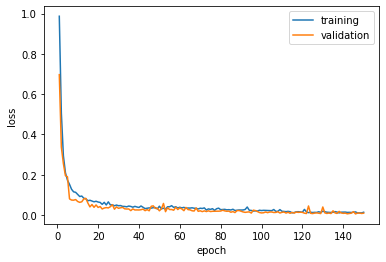

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,len(hist_df)+1)
training_loss = hist_df["loss"]
validation_loss = hist_df["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

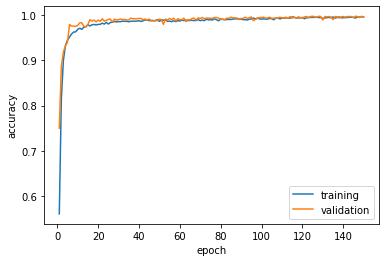

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,len(hist_df)+1)
training_accuracy = hist_df["accuracy"]
validation_accuracy = hist_df["val_accuracy"]
plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

In [ ]:
hist_csv_file = '/content/drive/MyDrive/TFM/history_cnn.csv'
hist_df = pd.read_csv(hist_csv_file, sep = ";")

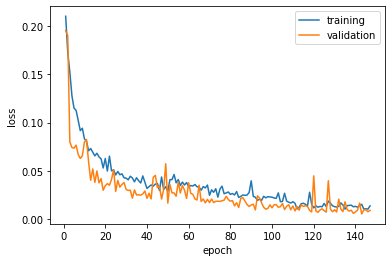

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,len(hist_df[3:])+1)
training_loss = hist_df["loss"][3:]
validation_loss = hist_df["val_loss"][3:]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

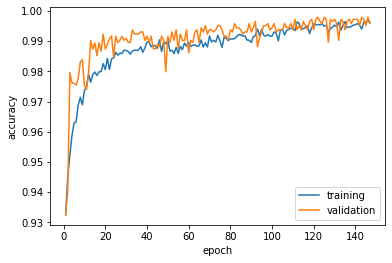

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,len(hist_df[3:])+1)
training_accuracy = hist_df["accuracy"][3:]
validation_accuracy = hist_df["val_accuracy"][3:]
plt.plot(epoch_nums, training_accuracy)
plt.plot(epoch_nums, validation_accuracy)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

## Inferencia

In [ ]:
# Código para cargar una red entrenada desde nuestro equipo al sevidor de Google Colab
from google.colab import files
model_cnn = tf.keras.models.load_model('/content/drive/MyDrive/ModelosGuardados/model_cnn.h5')
model_cnn

In [ ]:
model=model_cnn

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 320, 320, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 160, 160, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 160, 160, 48)      13872     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 80, 80, 48)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 80, 80, 56)        24248     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 40, 40, 56)      

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255) 

In [ ]:
test_generator = datagen.flow_from_directory('/content/drive/MyDrive/TFM/dataset/test_dataset',
                                            batch_size=1440,
                                            target_size=(320,320),
                                            class_mode='categorical')

Found 1440 images belonging to 4 classes.


In [ ]:
import os
data_folder = '/content/drive/MyDrive/TFM/dataset/test_dataset'
classes = os.listdir(data_folder)
classes.sort()

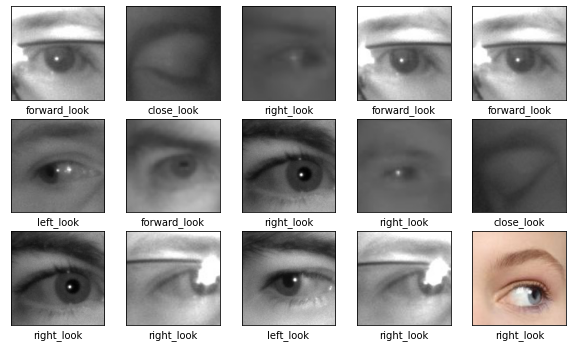

In [ ]:
# Visualización total o parcial de los datos
plt.figure(figsize=(10,10))
for imagen, etiqueta in test_generator:
  for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(320, 320, 3))
    plt.xlabel(classes[np.argmax(etiqueta[i])])
  break

Generating predictions from test data...
45/45 [==============================] - 9s 44ms/step


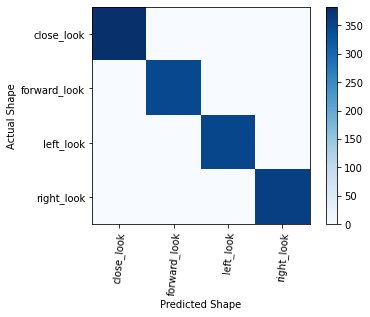

Average time of prediction: 7.7988 ms


In [ ]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import time

print("Generating predictions from test data...")
# Get the image and label arrays for the first batch of validation data
x_test = test_generator[0][0]
y_test = test_generator[0][1]

# Use the model to predict the class
start = time.time()
class_probabilities = model.predict(x_test)
end = time.time()

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

print("Average time of prediction: %6.4f" % (1000*(end-start) / (len(predictions))), "ms")

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels,predictions)
print("Accuracy: ", accuracy)

Accuracy:  0.9986111111111111


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predictions, target_names=classes))

              precision    recall  f1-score   support

  close_look       1.00      1.00      1.00       398
forward_look       1.00      1.00      1.00       337
   left_look       1.00      1.00      1.00       339
  right_look       1.00      1.00      1.00       366

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[383   0   0   0]
 [  0 346   0   0]
 [  0   0 349   1]
 [  0   1   0 360]]


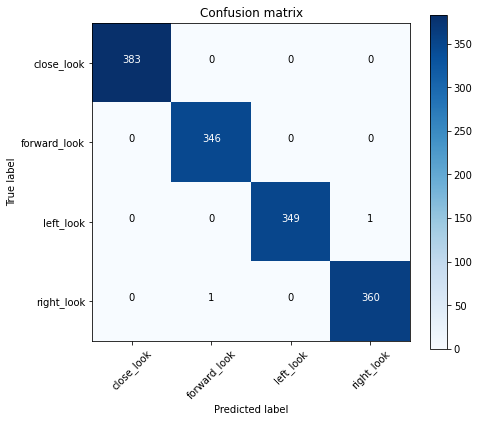

In [ ]:
cnf_matrix = confusion_matrix(true_labels, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (7,6))
plot_confusion_matrix(cnf_matrix, classes)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
res = []
for l in range(len(classes)):
    
    prec,recall, f_score, support = precision_recall_fscore_support(np.array(true_labels)==l,
                                                      np.array(predictions)==l,
                                                      pos_label=True,average=None)
    res.append([classes[l],recall[0],recall[1], prec[1], support[1]])

In [ ]:
pd.DataFrame(res,columns = ['class','specificity','sensitivity', 'precision', 'support'])

,class,specificity,sensitivity,precision,support
0,close_look,1.000000,1.000000,1.000000,383
1,forward_look,0.999086,1.000000,0.997118,346
2,left_look,1.000000,0.997143,1.000000,350
3,right_look,0.999073,0.997230,0.997230,361


In [ ]:
# make a prediction for a new image.
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model
tiempos = []
 
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(320, 320))
    plt.imshow(img)
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 320, 320, 3)
    # center pixel data
    img = img.astype('float32') / 255

    return img
 
# load an image and predict the class
def run_example(image_name):
    # load the image
    img = load_image("/content/drive/MyDrive/TFM/inferencia/" + image_name)
    # load model
    #model = tf.keras.models.load_model('drive/MyDrive/ModelosGuardados/model_resnet')
    # predict the class
    result = model.predict(img)
    print(result[0])
    etiqueta_prediccion = np.argmax(result)
    plt.xlabel(classes[etiqueta_prediccion])
    print(etiqueta_prediccion)
    print(classes[etiqueta_prediccion])

1/1 [==============================] - 0s 272ms/step
[3.99e-01 5.87e-04 2.42e-05 6.01e-01]
3
right_look
1/1 [==============================] - 0s 16ms/step
[2.35e-01 1.42e-05 7.61e-01 4.37e-03]
2
left_look
1/1 [==============================] - 0s 18ms/step
[1.00e+00 2.18e-05 3.39e-06 2.92e-04]
0
close_look
1/1 [==============================] - 0s 16ms/step
[3.64e-04 3.09e-01 6.88e-01 1.84e-03]
2
left_look


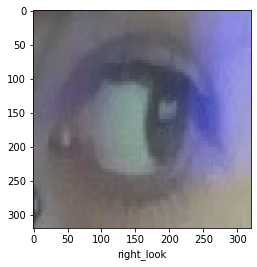

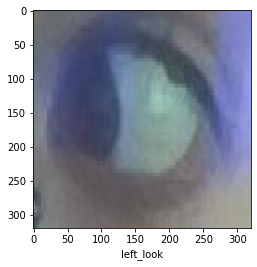

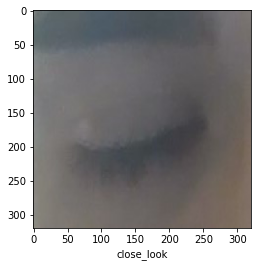

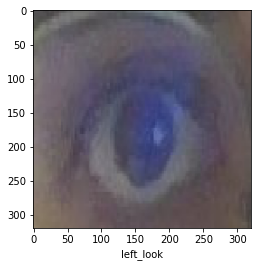

In [ ]:
model = tf.keras.models.load_model('drive/MyDrive/ModelosGuardados/model_cnn')
# entry point, run the example
image_names = ["yo_right.jpg", "yo_left.jpg", "yo_close3.jpg", "yo_forward.jpg"]
for image in image_names:
  plt.figure()
  run_example(image)

## Segunda Validación: datos webcam

4 classes:
['close_look', 'forward_look', 'left_look', 'right_look']


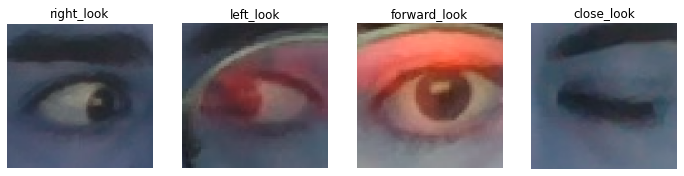

In [ ]:
from tensorflow.keras import models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

# The images are in the data/shapes folder
data_folder = '/content/drive/MyDrive/TFM/cv2_dataset'

# Get the class names
classes = os.listdir(data_folder)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(12, 24))
i = 0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(sub_dir)
plt.show()

In [ ]:
test_generator = datagen.flow_from_directory('/content/drive/MyDrive/TFM/dataset_webcam',
                                            batch_size=48,
                                            target_size=(320,320),
                                            class_mode='categorical')

Found 48 images belonging to 4 classes.


Generating predictions from test data...
2/2 [==============================] - 0s 48ms/step
Confusion matrix, without normalization
[[3 3 0 6]
 [5 2 0 5]
 [4 2 6 0]
 [1 2 0 9]]
Accuracy:  0.4166666666666667
Average time of prediction: 5.3285 ms


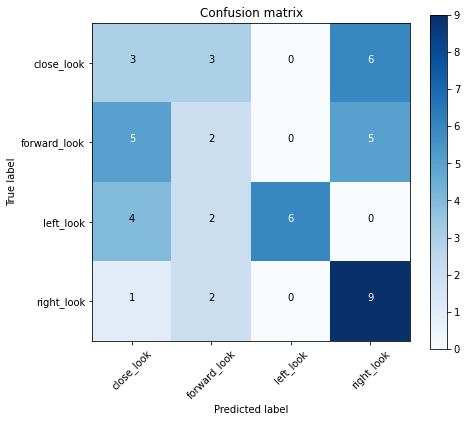

In [ ]:
model = tf.keras.models.load_model('drive/MyDrive/ModelosGuardados/model_cnn')
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import time

print("Generating predictions from test data...")
# Get the image and label arrays for the first batch of validation data
x_test = test_generator[0][0]
y_test = test_generator[0][1]

# Use the model to predict the class
start = time.time()
class_probabilities = model.predict(x_test)
end = time.time()

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

cnf_matrix = confusion_matrix(true_labels, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize = (7,6))
plot_confusion_matrix(cnf_matrix, classes)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels,predictions)
print("Accuracy: ", accuracy)

print("Average time of prediction: %6.4f" % (1000*(end-start) / (len(predictions))), "ms")

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
res = []
for l in range(len(classes)):
    
    prec,recall, f_score, support = precision_recall_fscore_support(np.array(true_labels)==l,
                                                      np.array(predictions)==l,
                                                      pos_label=True,average=None)
    res.append([classes[l],recall[0],recall[1], prec[1], support[1]])

In [ ]:
pd.DataFrame(res,columns = ['class','specificity','sensitivity', 'precision', 'support'])

,class,specificity,sensitivity,precision,support
0,close_look,0.722222,0.250000,0.230769,12
1,forward_look,0.805556,0.166667,0.222222,12
2,left_look,1.000000,0.500000,1.000000,12
3,right_look,0.694444,0.750000,0.450000,12
